In [1]:
import pandas as pd
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Data reading, cleaning and merging

In [2]:
data = pd.read_csv("../summary_data/sbt_features_oncopanel.csv")
data = data.set_index('Sample ID')

data = data.loc[data['Primary Cancer Diagnosis'] == 'Lung Adenocarcinoma', ]

data = data.loc[~data['Oncotree Biopsy Site'].isna(),]

# Dictionary of feature names

In [3]:
feature_dict_names = {'mtDNA_dosage_norm':'mtDNA copy number', '5S_dosage_norm':'5S rDNA copy number', 
                      '18S_dosage_norm':'18S rDNA copy number', '28S_dosage_norm':'28S rDNA copy number', 
                      '45S_dosage_norm':'45S rDNA copy number', 'n_fungi_norm':'fungal load', 
                      'n_microbial_norm':'microbial load', 'n_protozoa_norm':'protozoa load', 
                      'n_viral_norm':'viral load', 'loadIG_ligth_chain_norm':'IG κ and λ infiltration', 
                      'loadIG_norm':'BCR infiltration', 'loadIGH_norm':'IGH infiltration', 
                      'loadIGK_norm':'IG κ infiltration', 'loadIGL_norm':'IG λ infiltration', 
                      'loadTCR_norm':'T cell infiltration', 'loadTCRA_norm':'T cell α infiltration', 
                      'loadTCRB_norm':'T cell β infiltration', 'loadTCRD_norm':'T cell δ infiltration',
                      'loadTCRG_norm':'T cell γ infiltration', 'nIG_ligth_chain_norm':'IG κ and λ richness', 
                      'nIG_norm':'BCR richness', 'nIGH_norm':'IGH richness', 'nIGK_norm':'IG κ richness', 
                      'nIGL_norm':'IG λ richness', 'nTCR_norm':'TCR richness', 'nTCRA_norm':'TCR α richness', 
                      'nTCRB_norm':'TCR β richness', 'nTCRD_norm':'TCR δ richness', 'nTCRG_norm':'TCR γ richness',
                      'alphaIGH':'IGH Shannon', 'alphaIGK':'IG κ Shannon', 'alphaIGL':'IG λ Shannon', 
                      'alphaTCRA':'TCR α Shannon', 'alphaTCRB':'TCR β Shannon', 'alphaTCRD':'TCR δ Shannon', 
                      'alphaTCRG':'TCR γ Shannon'}

In [4]:
boxprops = {'edgecolor': 'k', 'linewidth': 2, 'facecolor': 'w'}
lineprops = {'color': 'k', 'linewidth': 2}
kwargs = {}
boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                           'whiskerprops': lineprops, 'capprops': lineprops,
                           'width': 0.8},
                          **kwargs)
stripplot_kwargs = dict({'linewidth': 0.9, 'size': 4, 'alpha': 0.4 },
                            **kwargs)

# Figure S8 - Microbiome distribution OP-LUAD

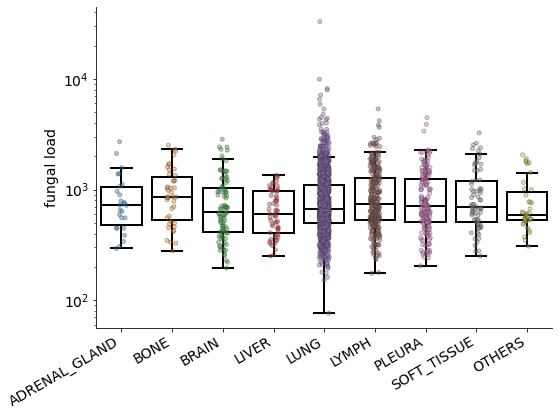

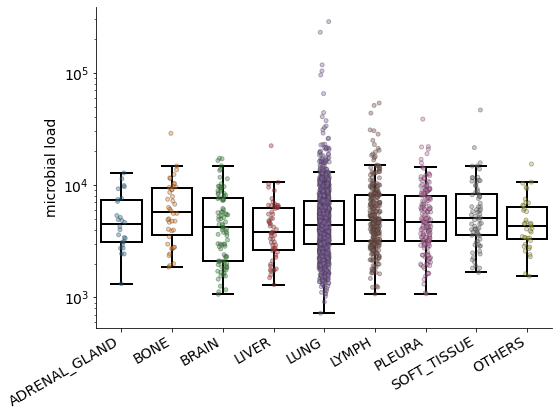

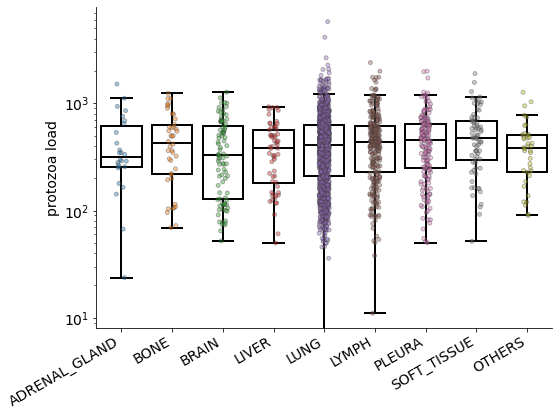

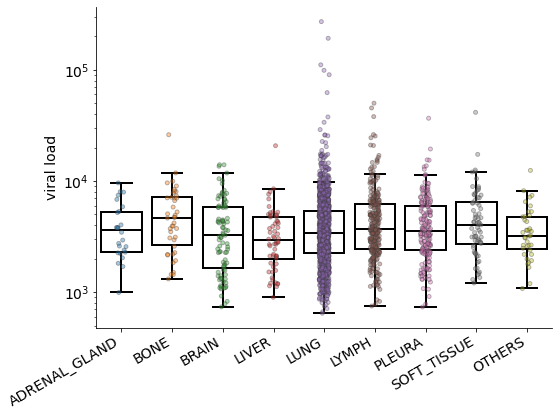

In [5]:
matplotlib.rcParams.update({'font.size': 14})

features = ['n_fungi_norm','n_microbial_norm','n_protozoa_norm','n_viral_norm']

labels = {'n_fungi_norm':'a','n_microbial_norm':'b','n_protozoa_norm':'c','n_viral_norm':'d'}

data_ = data.copy()

biopsy_order = ['ADRENAL_GLAND','BONE', 'BRAIN', 'LIVER', 'LUNG', 'LYMPH', 'PLEURA', 'SOFT_TISSUE', 'OTHERS']

data_['biopsy_group'] = data_['Oncotree Biopsy Site']
data_.loc[~data_['Oncotree Biopsy Site'].isin(biopsy_order), 'biopsy_group'] = 'OTHERS'


biopsy = list(set(data_['biopsy_group']))

for feature in features:
    M = sp.posthoc_dunn(data_, val_col=feature, group_col='biopsy_group', p_adjust = 'bonferroni')
    L = len(M.columns)
    for col in range(0,L):
        for row in range(col,L):
            pvalue = M[biopsy[col]][biopsy[row]]
            if row != col and pvalue < 0.05:
                print(feature, biopsy[col], biopsy[row], pvalue)

for feature in features:

    fig, ax = plt.subplots()
    fig = plt.gcf()
    fig.set_size_inches(8, 6)
    
    
    sns.stripplot(y=feature, x="biopsy_group", data=data_, ax =ax, order=biopsy_order, **stripplot_kwargs)
    sns.boxplot(y=feature, x="biopsy_group", data=data_, ax=ax, fliersize=0, order=biopsy_order, **boxplot_kwargs)

    
    sns.despine()
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    ax.set_xlabel('')
    ax.set_ylabel(feature_dict_names[feature])
    ax.set_yscale('log')    

    plt.tight_layout()    
    plt.savefig("../figures/FigS8"+labels[feature]+"_distribution_"+feature_dict_names[feature].replace(" ", "_")+".png", bbox_inches="tight")
    plt.show()